<a href="https://colab.research.google.com/github/mathewsrc/Natural-Language-Processing-in-Python/blob/master/named_entity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Named Entity Recognition (NER) is a task in Natural Language Processing (NLP) that involves identifying and classifying named entities in text. Named entities are specific objects, people, locations, organizations, or other types of entities that are referred to by name in text.

## NLTK

In [56]:
import nltk
from nltk.corpus import brown
from nltk import sent_tokenize, word_tokenize
nltk.download('punkt') # for tokenize
nltk.download('averaged_perceptron_tagger') # for pos tag
nltk.download('maxent_ne_chunker') # for named entity chunk
nltk.download('words') # for chunk extraction
nltk.download('brown')
from collections import defaultdict
from matplotlib import pyplot as plt
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [57]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [58]:
# Get a list of the files in the "news" category
news_fileids = brown.fileids(categories='news')

# Get the words in those files
article = brown.words(fileids=news_fileids)
article = ' '.join(article)

In [59]:
article = article.replace(" '' ", '').replace('``','' ).replace(' . ', '')
article[:100]

"The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produ"

In [60]:
# Tokenize the article into sentences: sentences
sentences = sent_tokenize(article) 
for sent in sentences[:3]:
  print(sent)

The Fulton County Grand Jury said Friday an investigation of Atlanta's recent primary election produced  no evidencethat any irregularities took placeThe jury further said in term-end presentments that the City Executive Committee , which had over-all charge of the election ,  deserves the praise and thanks of the City of Atlantafor the manner in which the election was conductedThe September-October term jury had been charged by Fulton Superior Court Judge Durwood Pye to investigate reports of possible  irregularitiesin the hard-fought primary which was won by Mayor-nominate Ivan Allen Jr. Only a relative handful of such reports was received, the jury said ,  considering the widespread interest in the election , the number of voters and the size of this city.
The jury said it did find that many of Georgia's registration and election laws  are outmoded or inadequate and often ambiguous.
It recommended that Fulton legislators act  to have these laws studied and revised to the end of mode

In [61]:
# Tokenize each sentence into words: token_sentences
token_sentences = [word_tokenize(sent) for sent in sentences]
print(token_sentences[1])

['The', 'jury', 'said', 'it', 'did', 'find', 'that', 'many', 'of', 'Georgia', "'s", 'registration', 'and', 'election', 'laws', 'are', 'outmoded', 'or', 'inadequate', 'and', 'often', 'ambiguous', '.']


In [62]:
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences)

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
count = 0
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label"):
            count += 1
            if count % 1000 == 0:
                print(chunk.label())
            ner_categories[chunk.label()] += 1

PERSON
GPE
PERSON
GPE
ORGANIZATION
GPE
GPE


In [63]:
print(set(ner_categories))

{'LOCATION', 'GSP', 'FACILITY', 'GPE', 'PERSON', 'ORGANIZATION'}


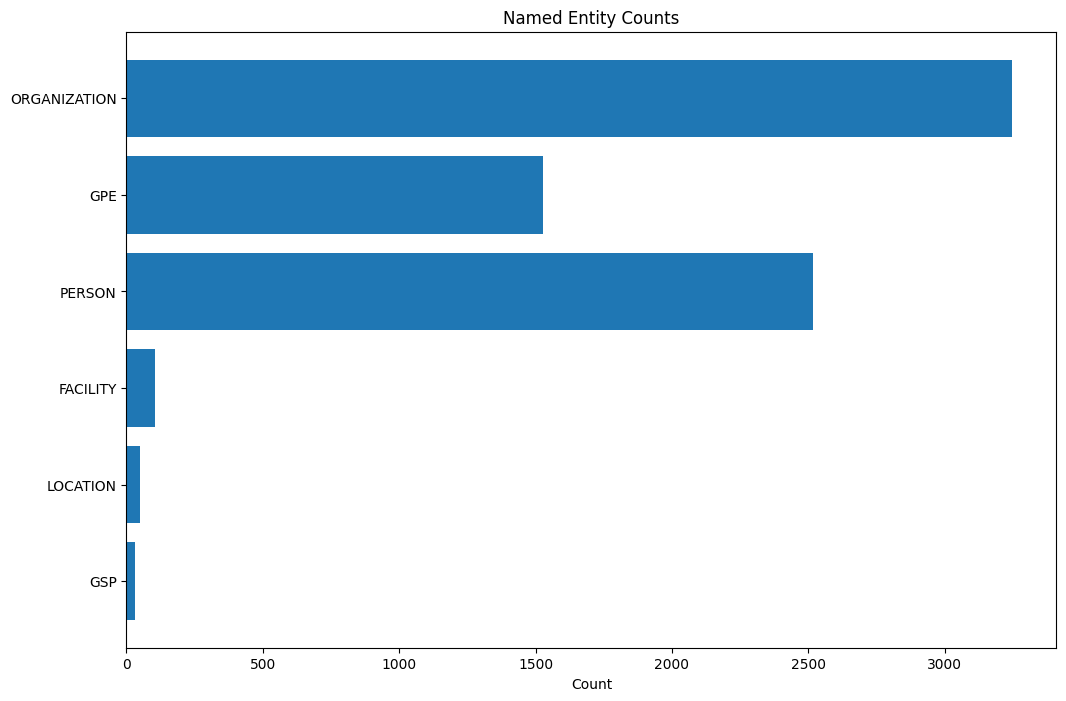

In [64]:
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(labels, values)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('Named Entity Counts')

# Display the chart
plt.show()

## SpaCy

Spacy is an open-source Natural Language Processing (NLP) library that is designed to be fast, efficient, and user-friendly. It provides a range of tools and features for performing various NLP tasks such as part-of-speech (POS) tagging, named entity recognition (NER), dependency parsing, and more.

In [65]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

In [66]:
# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
ner_categories = defaultdict(int)
for ent in doc.ents:
    ner_categories[ent.label_] += 1

/usr/local/lib/python3.9/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


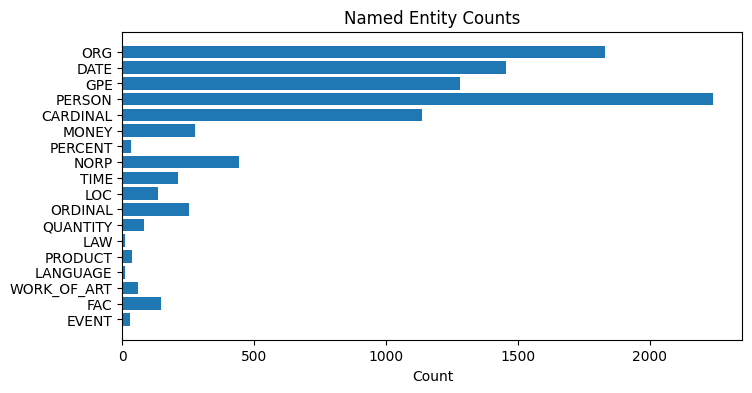

In [67]:
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(labels, values)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('Named Entity Counts')

# Display the chart
plt.show()